## Project: Olympics Data Analysis
### Problem Statement
The Olympic Games, considered to be the world's foremost sports competition has more than 200 nations participating across the Summer and Winter Games alternating by occurring every four years but two years apart.

Throughout this project, we will explore the Olympics dataset(scraped from https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table), look at some interesting statistics and then try to find out which country is the King of the Olympic Games.

#### About the dataset
The snapshot of the data, you will be working on:

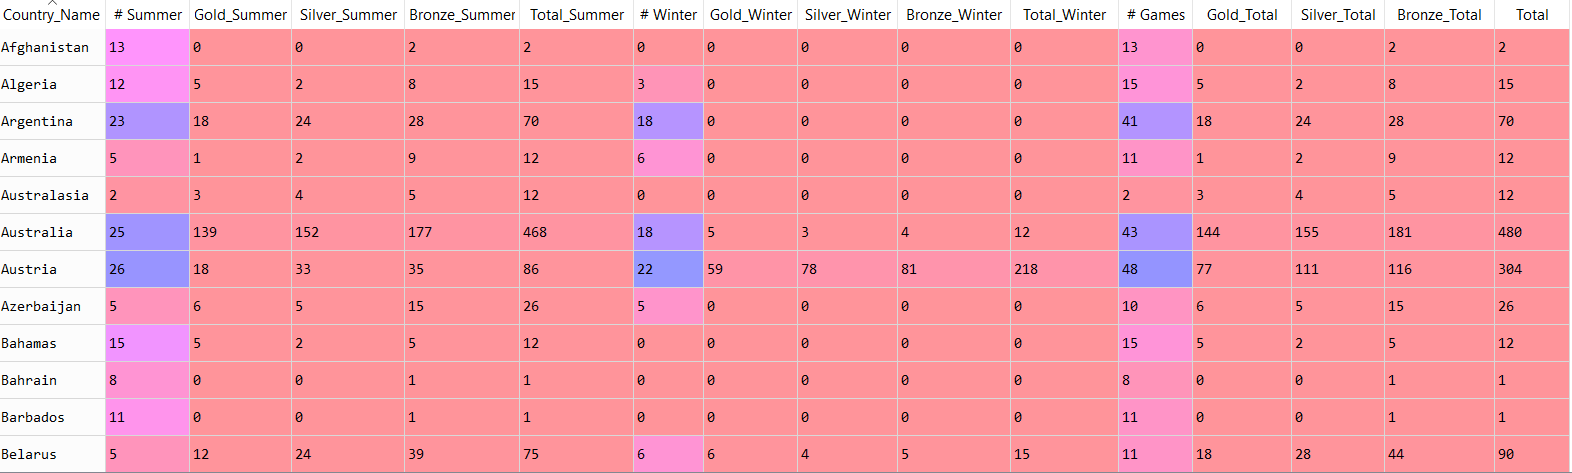

The dataset has details of 146 countries with the following 16 features

| Feature | Description |
|:-------:|:-----------:|
Country_Name | Name of the country
#Summer | No. of games played in Summer Olympics
Gold_Summer | No. of gold medals won in Summer Olympics
Silver_Summer | No. of silver medals won in Summer Olympics
Bronze_Summer | No. of bronze medals won in Summer Olympics
Total_Summer | Total no. of all the medals won in Summer Olympics
#Winter | No. of games played in Winter Olympics
Gold_Winter | No. of gold medals won in Winter Olympics
Silver_Winter | No. of silver medals won in Winter Olympics
Bronze_Winter | No. of bronze medals won in Winter Olympics
Total_Winter | Total no. of all the medals won in Winter Olympics
#Games | Total no. of games played in both Summer and Winter Olympics
Gold_Total | Total no. of gold medals won in both Summer and Winter Olympics
Silver_Total | Total no. of silver medals won in both Summer and Winter Olympics
Bronze_Total | Total no. of bronze medals won in both Summer and Winter Olympics
Total | Total no. of all the medals won in both Summer and Winter Olympics

#### Why solve this project?
After completing this project, you will have a better understanding of data handling with python(pandas). In this project, you will be applying the following concepts :
* Dataframe operations
* Conditional statement and loops
* List operations
* Bar Plotting
* Mathematical operations

### Step 1 - Data Loading
Let's start with the simple task of loading the data and do a little bit of renaming.

#### Instructions :
* Load the dataframe from the `path` using `pd.read_csv()` and store the dataframe in a variable called `'data'`.
* In the dataframe, rename the column `Total` to `Total_Medals`
* Display first 10 records using `"head()"` function to take a look at the dataframe.

In [1]:
#Importing header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Path of the file is stored in the variable path
#Code starts here

# Data Loading 
data = pd.read_csv(path)
data.rename( columns = {'Total':'Total_Medals'}, inplace = True )
data.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


### Step 2 - Summer or Winter
Some Countries love Summer, some Winter. We think it has to do something with their Olympic performance.

For this task, we will try to figure out which olympic event does a country perform better in.

#### Instructions :
* Create a new column `Better_Event` that stores `'Summer'`,`'Winter'` or `'Both'` based on the comparision between the total medals won in Summer event and Winter event (i.e. comparision between the `Total_Summer` and `Total_Winter` columns) using `"np.where()"` function.
---
```         Example of np.where() function:  ```
```sh
data = {'name': ['A', 'B', 'C', 'D', 'E'], 
        'age': [12, 66, 22, 80, 7], 
        'gender': ['M', 'F', 'F', 'M', 'M'],
        }
df = pd.DataFrame(data, columns = ['name', 'age', 'gender'])

print("dataframe before: \n",df)

"""
Creating a new column called senior_citizen where the value is yes 
if df.age is greater than 60 and no if not
"""
df['senior_citizen'] = np.where(df['age']>=60, 'yes', 'no')
print("dataframe after:\n",df)
```
**Output**
```sh
dataframe before: 

   name  age gender
0    A   12      M
1    B   66      F
2    C   22      F
3    D   80      M
4    E    7      M

dataframe after:
   name  age gender senior_citizen
0    A   12      M             no
1    B   66      F            yes
2    C   22      F             no
3    D   80      M            yes
4    E    7      M             no
```
---
* Find out which has been a better event with respect to all the performing countries by using `value_counts()` function and store it in a new variable called `'better_event'`.

In [2]:
# Summer or Winter
c1 = data['Total_Summer'] == data['Total_Winter']
c2 = data['Total_Summer'] > data['Total_Winter']
data['Better_Event'] = np.where( c1, 'Both', (np.where(c2, 'Summer', 'Winter')) )
better_event = data['Better_Event'][data['Better_Event'].value_counts().max()]
print(better_event)

Summer


### Step 3 - Top 10
So we figured out which is a better event for each country. Let's move on to finding out the best performing countries across all events

In this task we will try to find
* Which are the top 10 performing teams at summer event (with respect to total medals), winter event and overall?
* How many teams are present in all of the three lists above?

#### Instructions :
* Create a new dataframe subset called `'top_countries'` with the columns `['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']` only
* Drop the last row from `'top_countries'` (The last row contains the sum of the medals)
* **Create a function called `'top_ten'` that:**
1. Takes the dataframe `'top_countries'` and a column name as parameters.
2. Creates a new empty list called `'country_list'`
3. Find the top 10 values for that particular column(for e.g. `'Total_Summer'`) using `"nlargest()"` function
4. From the dataframe returned by `nlargest` function, slices the `Country_Name` column and stores it in the `'country_list'` list
5. Returns the `'country_list'`
---
```    Example of 'nlargest()' function : ```
```sh
df = pd.DataFrame({'ID': [1, 2, 3, 4, 5],
                 'Score': [33, 92, 26, 75, 80]})

print("The dataframe:\n",df)
# Filtering the 3 largest scores and getting the IDs associated with it
top_3=df.nlargest(3, 'Score')
print("df having top 3 scores:")
print(top_3)
print("IDs associated to top 3:")
print(list(top_3['ID']))
```
**Output**
```sh
The dataframe:
    ID  Score
0   1     33
1   2     92
2   3     26
3   4     75
4   5     80
df having top 3 scores:
   ID  Score
1   2     92
4   5     80
3   4     75
IDs associated to top 3:
[2, 5, 4]
```
---
Parameters :

| parameter | dtype | Argument Type | default value | description |
|:---------:|:-----:|:-------------:|:-------------:|:-----------:|
variable1 | pandas.DataFrame | compulsory |  | dataframe to be loaded
variable2 | string | compulsory |  | column name

Returns:

| returns | dtype | description |
|:-------:|:-----:|:-----------:|
variable1 | list | list containing countries names

* Call the `'top_ten()'` function for the three columns :`Total_Summer`, `Total_Winter` and `Total_Medals` and store their respective results in lists called `'top_10_summer'`, `'top_10_winter'` and `'top_10'`

* Create a new list `'common'` that stores the common elements between the three lists (`'top_10_summer'`, `'top_10_winter'` and `'top_10'`)

In [3]:
# Top 10
def top_ten(df, col):
    country_list = []
    a = df.nlargest(10, col)
    country_list = list(a['Country_Name'])
    return country_list

top_countries = pd.DataFrame( data, columns = ['Country_Name','Total_Summer', 'Total_Winter','Total_Medals'] )[:-1]
top_10_summer = top_ten(top_countries, 'Total_Summer')
top_10_winter = top_ten(top_countries, 'Total_Winter')
top_10 = top_ten(top_countries, 'Total_Medals')
common = list(set(top_10_summer) & set(top_10_winter) & set(top_10))
print( top_10_summer, "\n", top_10_winter, "\n", top_10, "\n", common )

['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia'] 
 ['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia'] 
 ['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia'] 
 ['Germany', 'United States', 'Soviet Union', 'Sweden']


### Step 4 - Plotting Top 10
From the lists that you have created from the previous task, let's plot the medal count of the top 10 countries for better visualisation

#### Instructions :
* Take the three previously created lists (top_10_summer, top_10_winter, top_10)
* Subset the dataframe `'data'` based on the country names present in the list `top_10_summer` using `"isin()"` function on the column `Country_Name`. Store the new subsetted dataframes in `'summer_df'`. Do the similar operation using `top_10_winter` and `top_10` and store the subset dataframes in `'winter_df'` & `'top_df'` respectively.
---
```    Example of isin() function: ```
```sh
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': ['Alpha', 'Beta', 'Gamma','Delta','Epsilon'], 'C':[1, 4, 9, 16, 25]})
#List
List= ['Beta','Epsilon']

#Usage of isin() function
subset_df=df[df['B'].isin(List)]

print(subset_df)
```
**Output**
```sh
  A        B   C
1  2     Beta   4
4  5  Epsilon  25
```
---
* Take each subsetted dataframe and plot a bar graph between the country name and total medal count according to the event (For e.g. for `'summer_df'` plot a bar graph between `Country_Name` and `Total_Summer`)
* Modify the axes info accordingly.

Text(0.5, 1.0, 'Top 10 Countries for Olympics Overall')

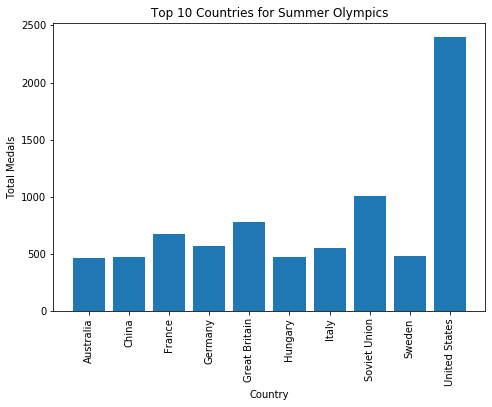

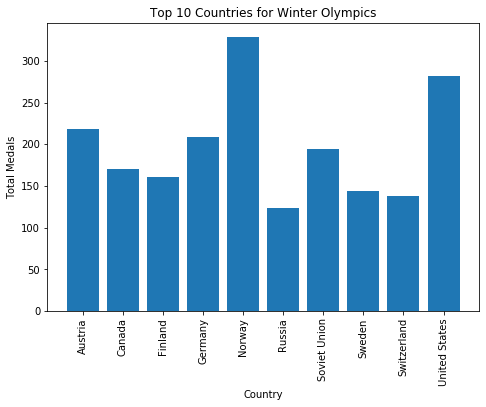

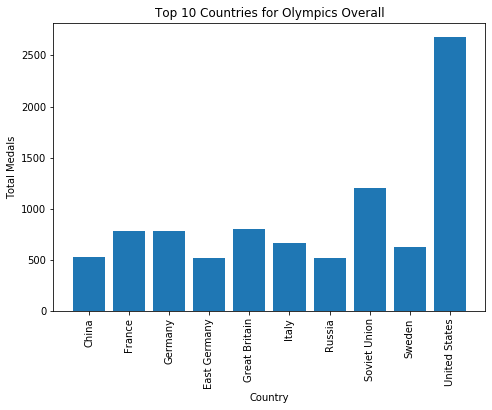

In [4]:
# Plotting top 10
summer_df = data[data['Country_Name'].isin(top_10_summer)]
winter_df = data[data['Country_Name'].isin(top_10_winter)]
top_df = data[data['Country_Name'].isin(top_10)]

p1 = plt.figure().add_axes([0,0,1,1])
p1.bar(summer_df['Country_Name'], summer_df['Total_Summer'])
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.title('Top 10 Countries for Summer Olympics')

p2 = plt.figure().add_axes([0,0,1,1])
p2.bar(winter_df['Country_Name'], winter_df['Total_Winter'])
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.title('Top 10 Countries for Winter Olympics')

p3 = plt.figure().add_axes([0,0,1,1])
p3.bar(top_df['Country_Name'], top_df['Total_Medals'])
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.title('Top 10 Countries for Olympics Overall')

### Step 5 - Top performing country (Gold)
Winning silver or bronze medals is a big achievement but winning gold is bigger.

Using the above created dataframe subsets, in this task let's find out which country has had the best performance with respect to the ratio between gold medals won and total medals won.

#### Instructions :
* In the dataframe `'summer_df'` (created in the previous function) , create a new column `Golden_Ratio` which is the quotient after dividing the two columns `Gold_Summer` and `Total_Summer`.
* Find the max value of `Golden_Ratio` and the country associated with it and store them in `summer_max_ratio` and `summer_country_gold` respectively.
* In the dataframe `'winter_df'` (created in the previous function) , create a new column `Golden_Ratio` which is the quotient after dividing the two columns `Gold_Winter` and `Total_Winter`.
* Find the max value of `Golden_Ratio` and the country associated with it and store them in `'winter_max_ratio'` and `'winter_country_gold'` respectively.
* In the dataframe `top_df'` (created in the previous function) , create a new column `Golden_Ratio` which is the quotient after dividing the two columns `Gold_Total` and `Total_Medals`.
* Find the max value of `Golden_Ratio` and the country associated with it and store them in `top_max_ratio'` and `'top_country_gold'` respectively.

In [5]:
# Top Performing Countries
summer_df['Golden_Ratio'] = summer_df['Gold_Summer'] % summer_df['Total_Summer']
summer_max_ratio = summer_df['Golden_Ratio'].max()
summer_country_gold = list(summer_df['Country_Name'][summer_df['Golden_Ratio']==summer_max_ratio])[0]
print( summer_max_ratio, summer_country_gold )

winter_df['Golden_Ratio'] = winter_df['Gold_Winter'] % winter_df['Total_Winter']
winter_max_ratio = winter_df['Golden_Ratio'].max()
winter_country_gold = list(winter_df['Country_Name'][winter_df['Golden_Ratio']==winter_max_ratio])[0]
print( winter_max_ratio, winter_country_gold )

top_df['Golden_Ratio'] = top_df['Gold_Total'] / top_df['Total_Medals']
top_max_ratio = top_df['Golden_Ratio'].max()
top_country_gold = list(top_df['Country_Name'][top_df['Golden_Ratio']==top_max_ratio])[0]
print( top_max_ratio, top_country_gold )

976 United States
118 Norway
0.4049429657794677 China


C:\Users\sherw\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sherw\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sherw\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

### Step 6 - Best in the world
Winning Gold is great but is winning most gold equivalent to being the best overall performer? Let's find out.

#### Instructions :
* Drop the last row from the dataframe (The last row contains the total of all the values calculated vertically) and save the result in `'data_1'`
* Update the dataframe `'data_1'` to include a new column called `Total_Points` which is a weighted value where each gold medal counts for 3 points, silver medals for 2 points, and bronze medals for 1 point. (i.e. You need to take the weighted value of `Gold_Total`, `Silver_Total` and `Bronze_Total`)
* Find the max value of `Total_Points` in `'data_1'` and the country associated with it and store it in variables `'most_points'` and `'best_country'` respectively.

In [6]:
# Best in the world 
data_1 = data[:-1]
data_1['Total_Points'] = data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1
most_points = data_1['Total_Points'].max()
best_country = list(data_1['Country_Name'][data_1['Total_Points']==most_points])[0]
print( most_points, best_country )

C:\Users\sherw\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5684 United States


### Step 7 - Plot for the best
We know which country is best when it comes to winning the most points in the Olympic Games. Let's plot the medal count to visualise their success better.

#### Instructions
* Create a single row dataframe called `'best'` from `'data'` where the value of column `Country_Name` is equal to `'best_country'` (The variable you created in the previous task)
* Subset `'best'` even further by only including the columns: `['Gold_Total','Silver_Total','Bronze_Total']`
* Create a stacked bar plot of `'best'` using `"DataFrame.plot.bar()"` function
* Name the x-axis as `United States` using `"plt.xlabel()"`
* Name the y-axis as `Medals Tally` using `"plt.ylabel()"`
* Rotate the labels of x-axis by 45 degrees using `"plt.xticks()"`

(array([0]), <a list of 1 Text xticklabel objects>)

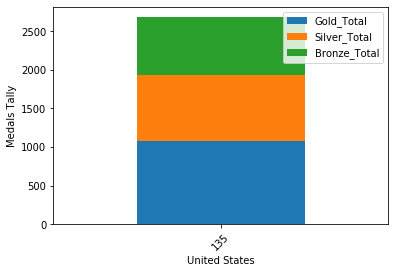

In [7]:
# Plotting the best
best = data[ data['Country_Name'] == best_country ]
best = pd.DataFrame( best, columns = ['Gold_Total','Silver_Total','Bronze_Total'] )
best.plot.bar( stacked=True )
plt.xlabel('United States')
plt.ylabel('Medals Tally')
plt.xticks(rotation=45)